In [4]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import r2_score

import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Melbourne Housing Data
From [Kaggle](https://www.kaggle.com/anthonypino/melbourne-housing-market)

## Data

In [5]:
raw_data = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")
print("Rows: {}\nColumns: {}".format(raw_data.shape[0], raw_data.shape[1]))
raw_data.head()

Rows: 52964
Columns: 12


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52964 entries, 0 to 52963
Data columns (total 12 columns):
Suburb           52964 non-null object
Address          52964 non-null object
Rooms            52964 non-null int64
Type             52964 non-null object
Price            41196 non-null float64
Method           52964 non-null object
SellerG          52964 non-null object
Date             52964 non-null object
Regionname       52964 non-null object
Propertycount    52964 non-null int64
Distance         52964 non-null float64
CouncilArea      52964 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 4.8+ MB


In [7]:
raw_data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            11768
Method               0
SellerG              0
Date                 0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

### Suburb

In [8]:
raw_data["Suburb"].describe()

count         52964
unique          375
top       Reservoir
freq           1032
Name: Suburb, dtype: object

In [9]:
raw_data["Suburb"].value_counts()

Reservoir            1032
Bentleigh East        703
Mount Waverley        700
Glen Waverley         681
Richmond              667
Craigieburn           622
Preston               580
Kew                   564
Glen Iris             564
Brunswick             537
Brighton              523
Northcote             517
South Yarra           517
Balwyn North          502
Camberwell            501
Hawthorn              500
Cheltenham            498
Coburg                486
Glenroy               486
Bundoora              481
Brighton East         477
Essendon              476
Mill Park             467
Pascoe Vale           446
St Kilda              431
Port Melbourne        427
Malvern East          424
Epping                420
Doncaster East        413
Hoppers Crossing      412
                     ... 
Olinda                  2
Belgrave                2
Kilsyth South           1
Warneet                 1
Yarrambat               1
Seville                 1
viewbank                1
Cockatoo    

In [10]:
raw_data.groupby("Suburb")["Price"].mean().apply(lambda x: format(x, ",.2f"))

Suburb
Abbotsford            1,043,008.33
Aberfeldie            1,326,969.14
Airport West            766,258.63
Albanvale               503,305.56
Albert Park           1,954,123.85
Albion                  618,452.44
Alphington            1,404,324.32
Altona                  889,918.85
Altona Meadows          631,789.47
Altona North            792,493.33
Ardeer                  603,594.20
Armadale              1,622,740.22
Ascot Vale            1,052,110.63
Ashburton             1,667,464.00
Ashwood               1,175,789.91
Aspendale             1,072,613.70
Aspendale Gardens       870,321.43
Attwood                 720,031.25
Avondale Heights        842,987.80
Avonsleigh                     nan
Bacchus Marsh           423,000.00
Balaclava               825,116.67
Balwyn                1,931,321.76
Balwyn North          1,757,060.51
Bayswater               753,557.89
Bayswater North         708,625.64
Beaconsfield            629,000.00
Beaconsfield Upper      716,666.67
Beaumaris    

### Address

In [11]:
raw_data["Address"].describe()

count           52964
unique          48396
top       3 Parker St
freq                7
Name: Address, dtype: object

In [12]:
raw_data["Address"].value_counts()

3 Parker St                  7
52 Station St                7
14 Northcote St              7
57 Bay Rd                    7
3 Donald St                  7
56 Victoria St               7
57 Hinkler Rd                6
14 Moray St                  6
23 Woorite Pl                6
5/169 Centre Dandenong Rd    6
4 Berry Ct                   6
6 Belmont Av                 6
40 Whyte St                  6
39 York St                   6
11 Highview Rd               6
11 The Avenue                6
33 Wattle St                 6
18 Wave St                   6
25 View St                   6
37 Cutter St                 6
84 Sackville St              6
8 Brogil Wk                  6
23 Latham St                 6
3/3 Narcissus Av             6
16a Jassa St                 6
103 Longview Rd              6
2 Grout St                   6
46 Chapel St                 6
6 Walter St                  6
12/1 Glen Huntly Rd          6
                            ..
11 Salisbury St              1
26 Milto

In [13]:
raw_data[raw_data["Address"] ==  "56 Victoria St"]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Regionname,Propertycount,Distance,CouncilArea
7169,Doncaster,56 Victoria St,3,h,1150000.0,PI,hockingstuart,6/01/2018,Eastern Metropolitan,9028,12.4,Manningham City Council
11063,Doncaster,56 Victoria St,3,h,1150000.0,PI,hockingstuart,8/01/2018,Eastern Metropolitan,9028,12.4,Manningham City Council
25552,Doncaster,56 Victoria St,3,h,1150000.0,PI,hockingstuart,16/12/2017,Eastern Metropolitan,9028,12.4,Manningham City Council
30242,Sandringham,56 Victoria St,5,h,2060000.0,PI,Hodges,18/06/2016,Southern Metropolitan,4497,15.2,Bayside City Council
38203,Doncaster,56 Victoria St,3,h,1150000.0,PI,hockingstuart,23/12/2017,Eastern Metropolitan,9028,12.4,Manningham City Council
41352,Sandringham,56 Victoria St,5,h,2250000.0,VB,hockingstuart,24/06/2017,Southern Metropolitan,4497,15.2,Bayside City Council
52386,Doncaster,56 Victoria St,3,h,1150000.0,PI,hockingstuart,30/12/2017,Eastern Metropolitan,9028,12.4,Manningham City Council


### Rooms

In [14]:
raw_data["Rooms"].describe()

count    52964.000000
mean         3.115512
std          0.960792
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         31.000000
Name: Rooms, dtype: float64

### Type

In [15]:
raw_data["Type"].describe()

count     52964
unique        3
top           h
freq      38057
Name: Type, dtype: object

In [16]:
raw_data["Type"].value_counts()

h    38057
u     9732
t     5175
Name: Type, dtype: int64

### Price

In [17]:
raw_data["Price"].describe().apply(lambda x: format(x, ",.2f"))

count        41,196.00
mean      1,001,992.56
std         603,396.86
min          85,000.00
25%         617,000.00
50%         835,000.00
75%       1,225,000.00
max      11,200,000.00
Name: Price, dtype: object

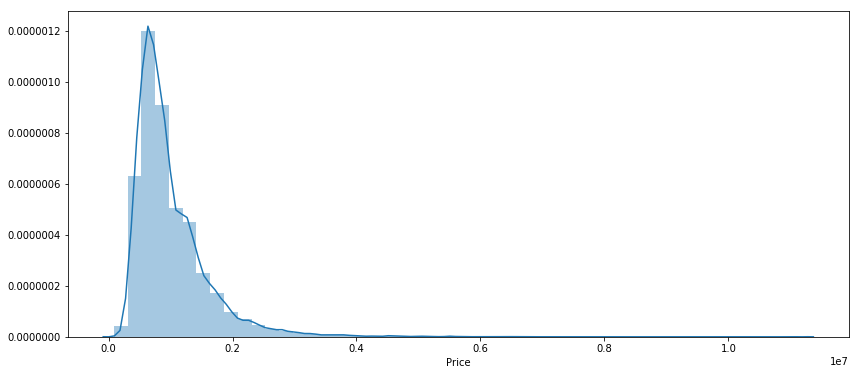

In [18]:
fig = plt.figure(figsize=(14, 6))
sns.distplot(raw_data["Price"].dropna())
plt.show()

### Method

In [19]:
raw_data["Method"].describe()

count     52964
unique        9
top           S
freq      29664
Name: Method, dtype: object

In [20]:
raw_data["Method"].value_counts()

S     29664
SP     7613
PI     7592
VB     4468
SN     2379
PN      521
SA      352
W       319
SS       56
Name: Method, dtype: int64

### SellerG

In [21]:
raw_data["SellerG"].describe()

count     52964
unique      434
top       Barry
freq       5911
Name: SellerG, dtype: object

In [22]:
raw_data["SellerG"].value_counts()

Barry                     5911
Jellis                    4454
Nelson                    3967
hockingstuart             3766
Ray                       3766
Buxton                    2817
Marshall                  2451
Fletchers                 1373
Biggin                    1222
Harcourts                 1087
Woodards                   988
YPA                        941
Noel                       935
McGrath                    885
Brad                       880
Hodges                     752
Stockdale                  697
Greg                       669
RT                         646
Miles                      598
Sweeney                    565
Raine                      544
Jas                        544
HAR                        544
O'Brien                    520
Gary                       512
RW                         435
Love                       432
Kay                        425
Philip                     380
                          ... 
Upper                        1
iOne    

### Date

In [23]:
raw_data["Date"].describe()

count          52964
unique            91
top       24/03/2018
freq            1144
Name: Date, dtype: object

In [24]:
raw_data["Date"].value_counts()

24/03/2018    1144
28/10/2017    1119
17/03/2018     970
27/11/2016     946
24/02/2018     941
9/12/2017      928
25/02/2017     924
10/12/2016     924
25/11/2017     902
18/11/2017     866
18/03/2017     859
4/03/2017      848
3/03/2018      846
8/04/2017      820
6/01/2018      787
8/01/2018      787
16/12/2017     787
30/12/2017     787
23/12/2017     787
3/12/2016      784
27/05/2017     770
20/05/2017     767
28/04/2018     763
23/09/2017     742
12/11/2016     741
19/11/2016     739
16/09/2017     730
15/10/2016     730
11/11/2017     729
28/05/2016     719
              ... 
3/09/2016      511
21/04/2018     506
29/07/2017     489
1/07/2017      482
22/04/2017     471
30/07/2016     467
22/08/2016     456
22/07/2017     449
6/05/2017      444
8/07/2017      429
6/08/2016      427
15/07/2017     421
7/04/2018      418
13/08/2016     376
16/07/2016     365
10/02/2018     341
26/07/2016     322
23/04/2016     312
11/02/2017     279
10/03/2018     168
12/06/2016     157
11/03/2017  

### Regionname

In [25]:
raw_data["Regionname"].describe()

count                     52964
unique                        8
top       Southern Metropolitan
freq                      14859
Name: Regionname, dtype: object

In [26]:
raw_data["Regionname"].value_counts()

Southern Metropolitan         14859
Northern Metropolitan         13910
Western Metropolitan           9801
Eastern Metropolitan           8810
South-Eastern Metropolitan     4421
Eastern Victoria                480
Northern Victoria               472
Western Victoria                211
Name: Regionname, dtype: int64

### Propertycount

In [27]:
raw_data["Propertycount"].describe()

count    52964.000000
mean      7610.820595
std       4414.860634
min         39.000000
25%       4380.000000
50%       6795.000000
75%      10412.000000
max      21650.000000
Name: Propertycount, dtype: float64

In [28]:
raw_data.groupby("Suburb")["Propertycount"].mean()

Suburb
Abbotsford             4019
Aberfeldie             1543
Airport West           3464
Albanvale              1899
Albert Park            3280
Albion                 2185
Alphington             2211
Altona                 5301
Altona Meadows         7630
Altona North           5132
Ardeer                 1281
Armadale               4836
Ascot Vale             6567
Ashburton              3052
Ashwood                2894
Aspendale              2824
Aspendale Gardens      2243
Attwood                1130
Avondale Heights       4502
Avonsleigh              335
Bacchus Marsh          2871
Balaclava              2952
Balwyn                 5682
Balwyn North           7809
Bayswater              5030
Bayswater North        3598
Beaconsfield           2332
Beaconsfield Upper      973
Beaumaris              5366
Belgrave               1588
                      ...  
Warrandyte             2003
Warranwood             1595
Waterways               709
Watsonia               2329
Watsonia Nort

In [29]:
raw_data[raw_data["Suburb"] == "Abbotsford"].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
670,Abbotsford,256 Langridge St,3,h,1350000.0,S,Biggin,1/07/2017,Northern Metropolitan,4019,3.0,Yarra City Council
2804,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,Northern Metropolitan,4019,3.0,Yarra City Council


### Distance

In [30]:
raw_data["Distance"].describe()

count    52964.000000
mean        12.704475
std          7.631408
min          0.000000
25%          7.000000
50%         11.400000
75%         16.700000
max         65.000000
Name: Distance, dtype: float64

In [31]:
raw_data.groupby("Suburb")["Distance"].mean()

Suburb
Abbotsford             3.0
Aberfeldie             7.5
Airport West          10.4
Albanvale             14.0
Albert Park            3.0
Albion                10.5
Alphington             5.7
Altona                11.0
Altona Meadows        15.5
Altona North           9.4
Ardeer                12.8
Armadale               6.3
Ascot Vale             4.3
Ashburton             10.2
Ashwood               10.2
Aspendale             21.5
Aspendale Gardens     21.5
Attwood               16.5
Avondale Heights       9.5
Avonsleigh            36.9
Bacchus Marsh         37.5
Balaclava              6.4
Balwyn                 7.9
Balwyn North           9.7
Bayswater             23.2
Bayswater North       23.2
Beaconsfield          39.0
Beaconsfield Upper    39.8
Beaumaris             17.3
Belgrave              30.4
                      ... 
Warrandyte            21.1
Warranwood            19.9
Waterways             21.5
Watsonia              14.5
Watsonia North        14.5
Wattle Glen          

### CouncilArea

In [32]:
raw_data["CouncilArea"].describe()

count                       52964
unique                         33
top       Boroondara City Council
freq                         4356
Name: CouncilArea, dtype: object

In [33]:
raw_data["CouncilArea"].value_counts()

Boroondara City Council           4356
Darebin City Council              3462
Banyule City Council              3146
Monash City Council               3023
Bayside City Council              2847
Brimbank City Council             2825
Moreland City Council             2555
Glen Eira City Council            2437
Hume City Council                 2390
Melbourne City Council            2285
Moonee Valley City Council        2086
Whittlesea City Council           2081
Kingston City Council             1984
Manningham City Council           1879
Maribyrnong City Council          1733
Stonnington City Council          1705
Whitehorse City Council           1506
Port Phillip City Council         1497
Yarra City Council                1405
Maroondah City Council            1256
Wyndham City Council              1234
Hobsons Bay City Council          1134
Knox City Council                  873
Greater Dandenong City Council     803
Frankston City Council             742
Melton City Council      

In [35]:
#Drop NA's
raw_data = raw_data.dropna()
print("Rows: {}\nColumns: {}\n".format(raw_data.shape[0], raw_data.shape[1]))
print(raw_data.isna().sum())

Rows: 41196
Columns: 12

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64


### Model 1: Try everything

In [36]:
# Make dummies
suburb_dummies = pd.get_dummies(raw_data["Suburb"], prefix="Suburb_", drop_first=True)
type_dummies = pd.get_dummies(raw_data["Type"], prefix="Type_", drop_first=True)
method_dummies = pd.get_dummies(raw_data["Method"], prefix="Method_", drop_first=True)
sellerG_dummies = pd.get_dummies(raw_data["SellerG"], prefix="SellerG_", drop_first=True)
regionname_dummies = pd.get_dummies(raw_data["Regionname"], prefix="Regionname_", drop_first=True)
councilArea_dummies = pd.get_dummies(raw_data["CouncilArea"], prefix="CouncilArea_", drop_first=True)

# Create month variable and generate dummies
raw_data["month"] = raw_data["Date"].apply(lambda x: int(x.split("/")[1]))
month_dummies = pd.get_dummies(raw_data["month"], prefix="month_", drop_first=True)

features = pd.concat([suburb_dummies, type_dummies, method_dummies, sellerG_dummies,
                      regionname_dummies, councilArea_dummies, month_dummies,
                     raw_data["Rooms"], raw_data["Distance"]], axis=1)

print("Rows: {}\nColumns: {}\n".format(features.shape[0], features.shape[1]))
features.head()

#features = pd.concat([regionname_dummies, type_dummies, method_dummies, councilArea_dummies,
                      #raw_data["Rooms"], raw_data["Distance"]], axis=1)
#features = pd.concat([raw_data["Rooms"], raw_data["Distance"]], axis=1)

Rows: 41196
Columns: 807



,Suburb__Aberfeldie,Suburb__Airport West,Suburb__Albanvale,Suburb__Albert Park,Suburb__Albion,Suburb__Alphington,Suburb__Altona,Suburb__Altona Meadows,Suburb__Altona North,Suburb__Ardeer,...,month__5,month__6,month__7,month__8,month__9,month__10,month__11,month__12,Rooms,Distance
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,7.5
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,10.4


In [38]:
start_time = time.time()
X = features
y = raw_data["Price"]

lm = LinearRegression()
lm.fit(X, y)

scores = cross_val_score(lm, X, y, cv=10, n_jobs=-1)
elapased_time = time.time() - start_time
print(scores)
print("Mean R^2: {:.4f}".format(np.mean(scores)))
print("Range: {:.4f}".format(np.max(scores) - np.min(scores)))
print("--------- {:.6f} seconds ---------".format(elapased_time))

[ 6.65387601e-01 -4.28869470e+15 -2.60035802e+14  6.71368549e-01
 -1.94941561e+16 -3.66009559e+12 -2.71007529e+15 -1.89669586e+14
 -3.56958783e+17 -4.74365277e+14]
Mean R^2: -38437944002248112.0000
Range: 356958783219310400.0000
--------- 32.283654 seconds ---------


### Model 2

In [39]:
features = pd.concat([raw_data["Rooms"], raw_data["Distance"]], axis=1)

In [40]:
start_time = time.time()
X = features
y = raw_data["Price"]

lm = LinearRegression()
lm.fit(X, y)

scores = cross_val_score(lm, X, y, cv=10, n_jobs=-1)
elapased_time = time.time() - start_time
print(scores)
print("Mean R^2: {:.4f}".format(np.mean(scores)))
print("Range: {:.4f}".format(np.max(scores) - np.min(scores)))
print("--------- {:.6f} seconds ---------".format(elapased_time))

[0.32747696 0.29176339 0.32318763 0.32934612 0.30513289 0.3280149
 0.31194495 0.32811389 0.24095136 0.3087727 ]
Mean R^2: 0.3095
Range: 0.0884
--------- 15.514657 seconds ---------


In [41]:
print("Intercept: {}".format(lm.intercept_))
for coef in list(zip(features.columns, lm.coef_)):
    print("{}: {}".format(coef[0], coef[1]))

Intercept: 391414.5746580212
Rooms: 329000.0388185408
Distance: -31529.34201984905


### Model 3

In [42]:
features = pd.concat([regionname_dummies, type_dummies, method_dummies, councilArea_dummies,
                      raw_data["Rooms"], raw_data["Distance"]], axis=1)

In [43]:
start_time = time.time()
X = features
y = raw_data["Price"]

lm = LinearRegression()
lm.fit(X, y)

scores = cross_val_score(lm, X, y, cv=10, n_jobs=-1)
elapased_time = time.time() - start_time
print(scores)
print("Mean R^2: {:.4f}".format(np.mean(scores)))
print("Range: {:.4f}".format(np.max(scores) - np.min(scores)))
print("--------- {:.6f} seconds ---------".format(elapased_time))

[0.59726009 0.56678779 0.58405566 0.60056911 0.5645513  0.59411495
 0.58206425 0.58977391 0.53413557 0.54190109]
Mean R^2: 0.5755
Range: 0.0664
--------- 6.522586 seconds ---------


In [44]:
print("Intercept: {}".format(lm.intercept_))
for coef in list(zip(features.columns, lm.coef_)):
    print("{}: {}".format(coef[0], coef[1]))

Intercept: 651143.4212885805
Regionname__Eastern Victoria: -73109.75727597848
Regionname__Northern Metropolitan: -234076.6574868861
Regionname__Northern Victoria: 96647.28271469919
Regionname__South-Eastern Metropolitan: -129993.59019046725
Regionname__Southern Metropolitan: -123590.11123765996
Regionname__Western Metropolitan: -120792.33581487408
Regionname__Western Victoria: 136605.81254459728
Type__t: -243522.59930596576
Type__u: -454517.4918737636
Method__S: 48144.29077974589
Method__SA: 517.078073909598
Method__SP: 24696.503051818523
Method__VB: 47379.87036276895
CouncilArea__Bayside City Council: 714098.6707948933
CouncilArea__Boroondara City Council: 711275.5071943991
CouncilArea__Brimbank City Council: -243655.21031634326
CouncilArea__Cardinia Shire Council: 481942.5880424873
CouncilArea__Casey City Council: 268503.1222627398
CouncilArea__Darebin City Council: 154423.31860288448
CouncilArea__Frankston City Council: 545465.6788014643
CouncilArea__Glen Eira City Council: 381601.5

### Model 4: Ridge Regression

In [45]:
# Everything again
features = pd.concat([suburb_dummies, type_dummies, method_dummies, sellerG_dummies,
                      regionname_dummies, councilArea_dummies, month_dummies,
                     raw_data["Rooms"], raw_data["Distance"]], axis=1)

In [46]:
start_time = time.time()
X = features
y = raw_data["Price"]

ridge_pipe = Pipeline([("rg_lm", Ridge())])
gs = GridSearchCV(estimator=ridge_pipe,
                 param_grid={"rg_lm__alpha": np.arange(0.0, 10.0, 0.1)},
                 scoring="r2",
                 cv=10,
                 n_jobs=-1)
gs.fit(X, y)
elapased_time = time.time() - start_time
print(gs.best_score_)
print(gs.best_params_)
print("--------- {:.6f} seconds ---------".format(elapased_time))

0.6513408310001335
{'rg_lm__alpha': 5.800000000000001}
--------- 489.974366 seconds ---------


In [47]:
start_time = time.time()
X = features
y = raw_data["Price"]

reg_lm = Ridge(alpha=5.800000000000001)
reg_lm.fit(X, y)

scores = cross_val_score(reg_lm, X, y, cv=10, n_jobs=-1)
elapased_time = time.time() - start_time
print(scores)
print("Mean R^2: {:.4f}".format(np.mean(scores)))
print("Range: {:.4f}".format(np.max(scores) - np.min(scores)))
print("--------- {:.6f} seconds ---------".format(elapased_time))

[0.6682131  0.65013173 0.66511358 0.67070839 0.63564306 0.66000067
 0.66014252 0.67021756 0.61845516 0.61477241]
Mean R^2: 0.6513
Range: 0.0559
--------- 13.005237 seconds ---------


### Model 5: LASSO

In [48]:
start_time = time.time()
lasso_lm = Lasso(alpha=5)
lasso_lm.fit(X, y)
elapased_time = time.time() - start_time
scores = cross_val_score(lasso_lm, X, y, cv=10, n_jobs=-1)
print(scores)
print("Mean R^2: {:.4f}".format(np.mean(scores)))
print("Range: {:.4f}".format(np.max(scores) - np.min(scores)))
print("--------- {:.6f} seconds ---------".format(elapased_time))

[0.66655598 0.64883348 0.6588431  0.67227717 0.62909127 0.65968059
 0.66042728 0.66985442 0.61701449 0.61492303]
Mean R^2: 0.6498
Range: 0.0574
--------- 20.761492 seconds ---------


In [ ]:
start_time = time.time()
lasso_pipe = Pipeline([("lasso_lm", Lasso())])
gs = GridSearchCV(estimator=lasso_pipe,
                 param_grid={"lasso_lm__alpha": np.arange(0.01, 10.0, 0.1)},
                 scoring="r2",
                 n_jobs=-1)
gs.fit(X, y)
elapased_time = time.time() - start_time
print(gs.best_score_)
print(gs.best_params_)
print("--------- {:.6f} seconds ---------".format(elapased_time))